## Imports

In [1]:
import os
import cv2
import glob
import torch
import numpy as np
from PIL import Image

# Download UCF101 Dataset From Kaggle

In [2]:
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("pevogam/ucf101")
print("Path to dataset files:", path)

# Verify the downloaded dataset
os.system("ls -lh  /home/zivfenig/research_methods/ucf101")

# Define the target directory
target_dir = "/home/zivfenig/research_methods/ucf101"  # Update this path as needed

# Ensure the target directory exists
os.makedirs(target_dir, exist_ok=True)

# Copy the dataset to the target directory
os.system(f"cp -r  /home/zivfenig/research_methods/ucf101 {target_dir}")

print(f"Dataset copied to: {target_dir}")


/home/zivfenig/.conda/envs/ziv_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/zivfenig/.cache/kagglehub/datasets/pevogam/ucf101/versions/1
total 4.0K
drwxr-xr-x 3 zivfenig domain users 4.0K Jan 21 11:42 ucf101
Dataset copied to: /home/zivfenig/research_methods/ucf101


cp: cannot copy a directory, '/home/zivfenig/research_methods/ucf101', into itself, '/home/zivfenig/research_methods/ucf101/ucf101'


## Extract Frames From Vidoe

In [3]:
def extract_frames(video_path, output_dir, frame_interval=10):
  """
  Extract frames from a .avi (or any supported) video every `frame_interval`.
  Returns a list of file paths to the extracted frames.
  """
  os.makedirs(output_dir, exist_ok=True)

  cap = cv2.VideoCapture(video_path)
  frame_count = 0
  saved_frames = []

  while True:
      ret, frame = cap.read()
      if not ret:
          break

      if frame_count % frame_interval == 0:
          frame_path = os.path.join(output_dir, f"frame_{frame_count:06d}.jpg")
          cv2.imwrite(frame_path, frame)
          saved_frames.append(frame_path)

      frame_count += 1

  cap.release()
  return saved_frames
  
import shutil

def process_ucf101_category(ucf101_root, category, frame_interval, output_dir):
  """
  Process all .avi videos in the specified category folder of UCF101.
  Extract frames from each video and save them in the specified output directory.

  :param ucf101_root: Root directory of the UCF101 dataset
  :param category: The category (action) folder to process
  :param frame_interval: Interval for frame extraction
  :param output_dir: Directory where the extracted frames will be saved
  """
  category_path = os.path.join(ucf101_root, category)
  if not os.path.isdir(category_path):
      print(f"Category path {category_path} does not exist.")
      return

  # Get all .avi files
  video_files = sorted(glob.glob(os.path.join(category_path, "*.avi")))
  if not video_files:
      print(f"No .avi files found in {category_path}.")
      return

  print(f"Found {len(video_files)} videos in {category} category.")

  for video_file in video_files:
      video_name = os.path.splitext(os.path.basename(video_file))[0]
      print(f"\n--- Processing video: {video_name} ---")

      # 1. Extract frames
      extracted_dir = os.path.join(output_dir, f"{video_name}_frames")
      os.makedirs(extracted_dir, exist_ok=True)  # Ensure output directory exists
      print("Extracting frames...")

      # Extract frames and save to the extracted_dir
      frame_paths = extract_frames(video_file, extracted_dir, frame_interval=frame_interval)

      # Ensure frame paths are saved correctly
      print(f"Extracted {len(frame_paths)} frames to {extracted_dir}")

# Create Frames Files By UCF101 Category

In [64]:
import shutil
import glob

def process_ucf101_category(ucf101_root, category, frame_interval, output_dir):
  """
  Process all .avi videos in the specified category folder of UCF101.
  Extract frames from each video and save them in the specified output directory.

  :param ucf101_root: Root directory of the UCF101 dataset
  :param category: The category (action) folder to process
  :param frame_interval: Interval for frame extraction
  :param output_dir: Directory where the extracted frames will be saved
  """
  category_path = os.path.join(ucf101_root, category)
  if not os.path.isdir(category_path):
      print(f"Category path {category_path} does not exist.")
      return

  # Get all .avi files
  video_files = sorted(glob.glob(os.path.join(category_path, "*.avi")))
  if not video_files:
      print(f"No .avi files found in {category_path}.")
      return

  print(f"Found {len(video_files)} videos in {category} category.")

  for video_file in video_files:
      video_name = os.path.splitext(os.path.basename(video_file))[0]
      print(f"\n--- Processing video: {video_name} ---")

      # 1. Extract frames
      extracted_dir = os.path.join(output_dir, f"{video_name}_frames")
      os.makedirs(extracted_dir, exist_ok=True)  # Ensure output directory exists
      print("Extracting frames...")

      # Extract frames and save to the extracted_dir
      frame_paths = extract_frames(video_file, extracted_dir, frame_interval=frame_interval)

      # Ensure frame paths are saved correctly
      print(f"Extracted {len(frame_paths)} frames to {extracted_dir}")
def main():
    # Root folder containing UCF101 dataset
    ucf101_root = "/home/zivfenig/research_methods/UCF-101"  # Update with your dataset path
    category = "BlowingCandles"  # Update with the category you want to process
    output_dir = '/home/zivfenig/research_methods/BlowingCandles'
    # Run the processing pipeline
    process_ucf101_category(ucf101_root=ucf101_root,category=category,frame_interval=5,output_dir=output_dir)
main()

Found 109 videos in BlowingCandles category.

--- Processing video: v_BlowingCandles_g01_c01 ---
Extracting frames...
Extracted 12 frames to /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g01_c01_frames

--- Processing video: v_BlowingCandles_g01_c02 ---
Extracting frames...
Extracted 15 frames to /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g01_c02_frames

--- Processing video: v_BlowingCandles_g01_c03 ---
Extracting frames...
Extracted 25 frames to /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g01_c03_frames

--- Processing video: v_BlowingCandles_g01_c04 ---
Extracting frames...
Extracted 14 frames to /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g01_c04_frames

--- Processing video: v_BlowingCandles_g02_c01 ---
Extracting frames...
Extracted 15 frames to /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g02_c01_frames

--- Processing video: v_BlowingCandles_g02_c02 ---
Extracting frames...
Extract

## Image File Loading

In [4]:
import os
from PIL import Image

def load_images_from_directory(directory_path):
    """
    Loads all images from the specified directory as PIL images (in RGB mode).
    Returns a list of PIL.Image objects.
    """
    valid_extensions = (".png", ".jpg", ".jpeg", ".bmp", ".gif")
    images_list = []

    # List all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is an image based on extension
        if filename.lower().endswith(valid_extensions):
            img_path = os.path.join(directory_path, filename)
            # Open and convert to RGB
            img = Image.open(img_path).convert("RGB")
            images_list.append(img)

    return images_list

# Example usage:
top_level_dir = "/home/zivfenig/research_methods/SoccerPenalty/v_SoccerPenalty_g03_c03_frames"  # directory containing subfolders of images
frames = load_images_from_directory(top_level_dir)
print(f"Loaded {len(frames)} images from '{top_level_dir}' and its subfolders.")

Loaded 28 images from '/home/zivfenig/research_methods/SoccerPenalty/v_SoccerPenalty_g03_c03_frames' and its subfolders.


In [5]:
# Example usage:
top_level_dir = "/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames"  # directory containing subfolders of images
frames_2 = load_images_from_directory(top_level_dir)
# print(f"Loaded {len(frames_2)} images from '{top_level_dir}' and its subfolders.")

## Blowing Candles Example (First Frame, Middle Frame, End Frame)

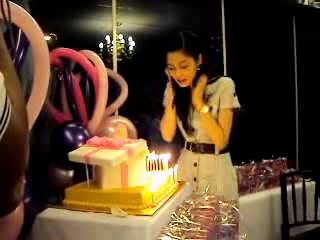

In [7]:
frames_2[0]

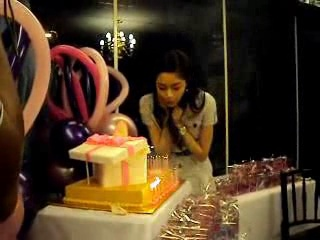

In [8]:
frames_2[13]

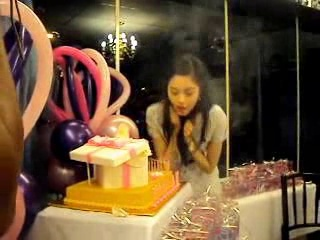

In [9]:
frames_2[25]

## Baseline

# Load the model (Blip 2)

In [10]:
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration,BlipProcessor, BlipForConditionalGeneration,VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import os
import cv2
import glob
import torch
import numpy as np


model_name = "Salesforce/blip2-opt-2.7b"  # Alternative model
processor = Blip2Processor.from_pretrained(model_name)

# # Load the model
model = Blip2ForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.float16,  # Use half-precision for GPU
    # device_map="auto",          # Automatically map to available devices
    temperature=0.9,            # Adjust temperature for randomness (lower for more deterministic responses)
    repetition_penalty=1.2  # Penalize repetitive phrases

)

# Additional configurations (if needed)
model.config.max_length = 512  # Set the maximum output token length

2025-01-25 10:18:33.952164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737793115.487138 3398045 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737793115.848423 3398045 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 10:18:40.304015: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/zivfenig/.conda/envs/ziv_env/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:628: UserWarni

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

## YOLO - Object Detection Model

In [12]:
from ultralytics import YOLO

# Load YOLO model
yolo = YOLO("yolov5s.pt")
    



PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



# frames Captioning Generation Using Blip Only

## Generation

In [88]:
# Function to analyze an image with BLIP
def analyze_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs1 = processor(image, return_tensors="pt").to(device)
    outputs1 = model.generate(**inputs1)
    caption = processor.decode(outputs1[0], skip_special_tokens=True)
    return caption

# Path to your image folder
image_folder = "/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames"
captions_BLIP2_only = [] # list saving all captions
# Process each image in the folder and print captions
print("Generating captions for images in the folder:")
for  i, image_path in enumerate( glob.glob(f"{image_folder}/*.jpg")):
    # print (i)
    caption_BLIP2_only = analyze_image(image_path)
    captions_BLIP2_only.append(caption_BLIP2_only)
    print(f"Image {i}")
    print(f"Caption: {caption_BLIP2_only}")
    print("-" * 50)

Generating captions for images in the folder:
Image 0
Caption: a woman blowing out candles on a birthday cake

--------------------------------------------------
Image 1
Caption: a woman blowing out a birthday cake

--------------------------------------------------
Image 2
Caption: a woman blowing out a birthday cake

--------------------------------------------------
Image 3
Caption: a woman blowing out candles on a birthday cake

--------------------------------------------------
Image 4
Caption: a woman blowing out a birthday cake

--------------------------------------------------
Image 5
Caption: a woman standing in front of a cake with balloons

--------------------------------------------------
Image 6
Caption: a woman blowing out candles on a birthday cake

--------------------------------------------------
Image 7
Caption: a woman blowing out a candle on a birthday cake

--------------------------------------------------
Image 8
Caption: a woman blowing out a candle on a cake

## Image Captioning Model + Incorporate Adjacent Frames

In [52]:
import cv2
from PIL import Image
import numpy as np

def analyze_frame_with_edge_detection(frame_path):
    # Load the frame as grayscale
    original_image = cv2.imread(frame_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
    
    # Convert edge-detected image to PIL format
    edges_pil = Image.fromarray(edges).convert("RGB")
    
    # Preprocess image and generate caption
    inputs = processor(images=edges_pil, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

## Generation

In [89]:
# Process images with edge detection and captioning
print("Generating captions with edge detection:")
captions_BLIP2_edge_detection =[] # List for saving all captions
for i,image_path in enumerate(glob.glob(f"{image_folder}/*.jpg")):
    caption_BLIP2_edge_detection = analyze_frame_with_edge_detection(image_path)
    captions_BLIP2_edge_detection.append(caption_BLIP2_edge_detection)
    print(f"Image: {i}")
    print(f"Caption: {caption_BLIP2_edge_detection}")
    print("-" * 50)

Generating captions with edge detection:
Image: 0
Caption: a black and white drawing of a man in a room

--------------------------------------------------
Image: 1
Caption: a black and white drawing of a man in a room

--------------------------------------------------
Image: 2
Caption: a black and white drawing of a man in a room

--------------------------------------------------
Image: 3
Caption: a drawing of a man and woman in a room

--------------------------------------------------
Image: 4
Caption: a black and white drawing of a man in a room

--------------------------------------------------
Image: 5
Caption: a black and white drawing of a man and woman in a room

--------------------------------------------------
Image: 6
Caption: a black and white drawing of a man in a room

--------------------------------------------------
Image: 7
Caption: a black and white drawing of a man in a room

--------------------------------------------------
Image: 8
Caption: a black and white

## Blip 2 For Image Caption + YOLO For Object Detection + GPT-4 For Caption Refignment

In [ ]:
from ultralytics import YOLO
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import openai
import glob
# Set YOUR OpenAI API key
openai.api_key = ""

# Detect objects in the image
def detect_objects(image_path):
    results = yolo(image_path)
    if len(results) == 0 or len(results[0].boxes) == 0:
        return []
    return [yolo.model.names[int(box.cls)] for box in results[0].boxes]

# Generate a BLIP-2 caption for an image
def generate_caption_with_blip(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

def refine_caption_with_gpt(current_caption, detected_objects, prev_caption=None):
    object_list = ", ".join(detected_objects)
    prompt = (
        f"The current frame contains the following objects: {object_list}.\n"
        f"The BLIP-2 caption for this frame is: '{current_caption}'.\n"
    )
    if prev_caption:
        prompt += f"The previous frame's caption was: '{prev_caption}'.\n"
    prompt += (
        "Please refine the current caption to include details about the scene, actions, "
        "and any noticeable changes between this frame and the previous one."
    )

    # Add `max_tokens` and `temperature` for controlled generation
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=30,  
        temperature=0.5, # Reduce creativity for more deterministic output
        stop=["."]  
    )
    return response['choices'][0]['message']['content']


In [24]:
# Main pipeline
def process_video_frames(image_folder):
    frame_paths = sorted(glob.glob(f"{image_folder}/*.jpg"))
    refined_captions = []
    prev_caption = None

    for i, frame_path in enumerate(frame_paths):
        print(f"Processing frame {i+1}/{len(frame_paths)}: {frame_path}")

        # Step 1: Detect objects with YOLO
        detected_objects = detect_objects(frame_path)

        # Step 2: Generate a BLIP-2 caption
        blip_caption = generate_caption_with_blip(frame_path)

        # Step 3: Refine the caption with GPT-4
        refined_caption = refine_caption_with_gpt(blip_caption, detected_objects, prev_caption)
        refined_captions.append(refined_caption)

        # Update previous caption
        prev_caption = refined_caption

        # Display refined caption
        print(f"Frame {i+1} Refined Caption: {refined_caption}")
        print("-" * 50)

    return refined_captions

## Generation

In [64]:
# Path to video frames
image_folder = "/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames"
refined_captions_using_blip2_yolo_gpt4 = process_video_frames(image_folder)

Processing frame 1/27: /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000000.jpg
Frame 1 Refined Caption: 'In a warmly lit room, a woman with a radiant smile, surrounded by her friends, is leaning forward to blow out the flickering candles on
--------------------------------------------------
Processing frame 2/27: /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000005.jpg
Frame 2 Refined Caption: 'In the warmly lit room, the radiant woman, now surrounded by an excited hush from her friends, successfully blows out the flickering candles on
--------------------------------------------------
Processing frame 3/27: /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000010.jpg
Frame 3 Refined Caption: 'In the warmly lit room, the radiant woman, now basking in the afterglow of the extinguished candles, exhales the last puff
--------------------------------------------------
Processin

## Ablation Study - BLIP2 For image captioning and GPT-4 For Refignment (Without YOLO)

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import openai
import glob

# Set YOUR OpenAI API key
openai.api_key = ""

# Generate a BLIP-2 caption for an image
def generate_caption_with_blip(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

# Refine a BLIP-2 caption with GPT-4
def refine_caption_with_gpt(current_caption, prev_caption=None):
    prompt = (
        f"The BLIP-2 caption for the current frame is: '{current_caption}'.\n"
    )
    if prev_caption:
        prompt += f"The previous frame's caption was: '{prev_caption}'.\n"
    prompt += (
        "Please refine the current caption to include details about the scene, actions, "
        "and any noticeable changes between this frame and the previous one."
    )

    # Add `max_tokens` and `temperature` for controlled generation
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=30,  # Limit the response length
        temperature=0.5,  # Reduce creativity for more deterministic output
        stop=["."]  # Stop at the end of a sentence
    )
    return response['choices'][0]['message']['content']

# Main pipeline
def process_video_frames(image_folder):
    frame_paths = sorted(glob.glob(f"{image_folder}/*.jpg"))
    refined_captions = []
    prev_caption = None

    for i, frame_path in enumerate(frame_paths):
        print(f"Processing frame {i+1}/{len(frame_paths)}: {frame_path}")

        # Step 1: Generate a BLIP-2 caption
        blip_caption = generate_caption_with_blip(frame_path)

        # Step 2: Refine the caption with GPT-4
        refined_caption = refine_caption_with_gpt(blip_caption, prev_caption)
        refined_captions.append(refined_caption)

        # Update previous caption
        prev_caption = refined_caption

        # Display refined caption
        print(f"Frame {i+1} Refined Caption: {refined_caption}")
        print("-" * 50)

    return refined_captions

# Path to video frames
image_folder = "/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames"
refined_captions_using_blip2_gpt4 = process_video_frames(image_folder)


Processing frame 1/27: /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000000.jpg
Frame 1 Refined Caption: 'In a warmly lit room adorned with party decorations, a woman with a radiant smile is leaning forward to blow out the multitude of flickering candles on
--------------------------------------------------
Processing frame 2/27: /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000005.jpg
Frame 2 Refined Caption: 'In the warmly lit room, filled with festive decorations, the radiant woman successfully blows out the flickering candles on her birthday cake, her smile still
--------------------------------------------------
Processing frame 3/27: /home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000010.jpg
Frame 3 Refined Caption: 'In the softly illuminated room, the woman, still radiant with joy, has successfully extinguished all the flickering candles on her birthday cake
-------

## Prediction Using Frames

In [83]:
# Function to predict the next frame caption
def predict_next_frame(input_captions):
    # Combine the input captions
    input_text = "\n".join([f"Frame {i+1}: {caption}" for i, caption in enumerate(input_captions)])
    
    # Create the prompt
    prompt = (
        f"The following captions describe the frames of a video:\n{input_text}\n\n"
        f"Based on this sequence, predict the caption for the next frame. Only one frame "
        "Continue the story logically and include details about actions, objects, and changes."
    )
    
    # Call GPT-4
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=100,  # Limit the response length
        temperature=0.5  # Less creative, more deterministic
    )
    
    # Extract and return the predicted caption
    return response['choices'][0]['message']['content']

## Generate the Next frame Based On X initial frames caption (Made By GPT-4)

## Prediction For Our Pipline - Blip2 + YOLO For Captioning, GPT-4 For Refignment

In [90]:
# Number of initial frames to use
X = 26  # Use the first 3 captions
# print(refined_captions_using_blip2_yolo_gpt4)
# Get the input captions
input_captions = refined_captions_using_blip2_yolo_gpt4[:X]

# Predict the next frame caption
next_frame_caption_using_Blip2_yolo_gpt4 = predict_next_frame(input_captions)

# Display the result
print("Input Captions:")
# for i, caption in enumerate(input_captions):
#     print(f"Frame {i+1}: {caption}")
print("\nPredicted Caption for the Next Frame:")
print(next_frame_caption_using_Blip2_yolo_gpt4)

Input Captions:

Predicted Caption for the Next Frame:
Frame 27: 'In the warmly lit room, the woman, her face radiant with joy and satisfaction, is now surrounded by her friends' applause and cheer, celebrating her successful extinguishing of all the candles on her birthday cake.


## Prediction For the Baseline - Blip2 For Captioning

In [92]:
# Number of initial frames to use
X = 26  # Use the first 3 captions

# Get the input captions
input_captions = captions_BLIP2_only[:X]

# Predict the next frame caption
next_frame_caption_using_Blip2 = predict_next_frame(input_captions)

# Display the result
print("Input Captions:")
# for i, caption in enumerate(input_captions):
#     print(f"Frame {i+1}: {caption}")
print("\nPredicted Caption for the Next Frame:")
print(next_frame_caption_using_Blip2)

Input Captions:

Predicted Caption for the Next Frame:
Frame 27: a woman celebrating, surrounded by friends and family, after blowing out the candles on her birthday cake.


## Prediction For Blip2+Edge Detection

In [93]:
# Number of initial frames to use
X = 26  # Use the first 3 captions

# Get the input captions
print(caption_BLIP2_edge_detection)
input_captions = captions_BLIP2_edge_detection[:X]

# Predict the next frame caption
next_frame_caption_using_Blip2_edge_detection = predict_next_frame(input_captions)

# Display the result
print("Input Captions:")
# for i, caption in enumerate(input_captions):
#     print(f"Frame {i+1}: {caption}")
print("\nPredicted Caption for the Next Frame:")
print(next_frame_caption_using_Blip2_edge_detection)

a drawing of a man in a room with a woman

Input Captions:

Predicted Caption for the Next Frame:
Frame 27: a black and white drawing of a man and woman having a conversation in a room.


## Prediction For The Ablation Study -  Blip2 For Captioning, GPT-4 For Refignment

In [40]:
# Number of initial frames to use
X = 26  # Use the first 3 captions

# Get the input captions
input_captions = refined_captions_using_blip2_gpt4[:X]

# Predict the next frame caption
next_frame_caption_using_Blip2_gpt4 = predict_next_frame(input_captions)

# Display the result
print("Input Captions:")
# for i, caption in enumerate(input_captions):
#     print(f"Frame {i+1}: {caption}")
print("\nPredicted Caption for the Next Frame:")
print(next_frame_caption_using_Blip2_gpt4)

Input Captions:

Predicted Caption for the Next Frame:
Frame 27: 'A woman, previously seen triumphantly next to a birthday cake with a single extinguished candle, now has her cheeks puffed out, making a final effort to blow out the remaining candles on the cake.


## Evaluations

## 1. Evaluate Frames Captions Using CLIP Model

In [100]:
image_folder = '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames'
image_paths = sorted(glob.glob(f"{image_folder}/*.jpg"))
# print(image_paths)

['/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000000.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000005.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000010.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000015.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000020.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000025.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000030.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000035.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000040.jpg', '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames/frame_000045.jpg', '/home/zi

In [137]:
import clip
import torch
from PIL import Image
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import textstat
from collections import Counter

# Load models
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
# Function to compute CLIP similarity
def compute_clip_similarity(image_path, caption, prev_caption = None):
      # Process the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    text = clip.tokenize([caption]).to(device)

    # Compute image and text embeddings
    with torch.no_grad():
        image_features = clip_model.encode_image(image)
        text_features = clip_model.encode_text(text)
    
    # Calculate CLIP similarity
    clip_similarity = torch.cosine_similarity(image_features, text_features).item()

    # Penalize for undivergent captions
    if prev_caption:
        # Compute Jaccard divergence as a penalty factor
        words_current = set(caption.split())
        words_prev = set(prev_caption.split())
        intersection = len(words_current & words_prev)
        union = len(words_current | words_prev)
        divergence = 1 - (intersection / union if union > 0 else 0)  # Jaccard divergence

        # Apply penalty: Reduce similarity based on lack of divergence
        clip_similarity *= divergence  # Scale similarity by divergence (lower = more penalty)

    return clip_similarity


# Evaluate all methods
methods = {
    "BLIP2 Only": captions_BLIP2_only,
    "BLIP2 + Edge Detection": captions_BLIP2_edge_detection,
    "BLIP2 + YOLO + GPT-4": refined_captions_using_blip2_yolo_gpt4,
    "BLIP2 + GPT-4": refined_captions_using_blip2_gpt4,
}

captions_score_results = {}

for method_name, captions in methods.items():
    print(f"Evaluating {method_name}...")
    
    # CLIP similarity
    prev_caption = None
    clip_similarities = []
    for i, (image_path, caption) in enumerate(zip(image_paths, captions)):
        similarity = compute_clip_similarity(image_path, caption, prev_caption)
        clip_similarities.append(similarity)
        prev_caption = caption  # Update the previous caption
    
    
    
    # Store results
    captions_score_results[method_name] = clip_similarities

# Display results
for method_name, metrics in captions_score_results.items():
    print(f"\nResults for {method_name}:")
    # print(f"CLIP Similarities: {metrics['CLIP Similarities']}")
    print(f"Average CLIP Similarity: {sum(captions_score_results[method_name]) / len(captions_score_results[method_name]):.4f}")


    print("-" * 50)

Evaluating BLIP2 Only...
Evaluating BLIP2 + Edge Detection...
Evaluating BLIP2 + YOLO + GPT-4...
Evaluating BLIP2 + GPT-4...

Results for BLIP2 Only:
Average CLIP Similarity: 0.1021
--------------------------------------------------

Results for BLIP2 + Edge Detection:
Average CLIP Similarity: 0.0190
--------------------------------------------------

Results for BLIP2 + YOLO + GPT-4:
Average CLIP Similarity: 0.1631
--------------------------------------------------

Results for BLIP2 + GPT-4:
Average CLIP Similarity: 0.1843
--------------------------------------------------



## 2. Evaluate Predicted Next Frame Using Clip

In [101]:
image_folder = '/home/zivfenig/research_methods/BlowingCandles/v_BlowingCandles_g22_c01_frames'
image_paths = sorted(glob.glob(f"{image_folder}/*.jpg"))
last_frame_image_path = image_paths[-1]  # Path to the last frame

In [105]:
from PIL import Image
import torch
import clip

# Load CLIP model and preprocessing
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# Function to compute CLIP similarity
def compute_clip_similarity(image_path, caption):
    """
    Compute the cosine similarity between the image and caption using CLIP.
    """
    # Preprocess the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    # Tokenize the caption
    text = clip.tokenize([caption]).to(device)

    # Compute embeddings
    with torch.no_grad():
        image_features = clip_model.encode_image(image)
        text_features = clip_model.encode_text(text)

    # Compute cosine similarity
    similarity = torch.cosine_similarity(image_features, text_features).item()
    return similarity

# Captions to evaluate
methods = {
    "BLIP2 + YOLO + GPT-4": next_frame_caption_using_Blip2_yolo_gpt4,
    "BLIP2 Only": next_frame_caption_using_Blip2,
    "BLIP2 + Edge Detection": next_frame_caption_using_Blip2_edge_detection,
    "BLIP2 + GPT-4": next_frame_caption_using_Blip2_gpt4,
}

# Compute CLIP similarity for each method
predictions_score_results = {}
for method, caption in methods.items():
    similarity = compute_clip_similarity(last_frame_image_path, caption)
    predictions_score_results[method] = similarity

# Print results
print("CLIP Similarity Scores for Predicted Next-Frame Captions:")
for method, score in predictions_score_results.items():
    print(f"{method}: {score:.4f}")

CLIP Similarity Scores for Predicted Next-Frame Captions:
BLIP2 + YOLO + GPT-4: 0.2886
BLIP2 Only: 0.2986
BLIP2 + Edge Detection: 0.1066
BLIP2 + GPT-4: 0.3298


## Statistical Tests

In [196]:
import scipy.stats as stats

def evaluate_statistical_tests(result_dict, captions=True):
    """
    Perform pairwise statistical t-tests on a results dictionary for CLIP scores.

    Parameters:
    - result_dict (dict): Dictionary containing methods as keys.
                          If captions=True, values are lists of scores.
                          If captions=False, values are single scores.
    - captions (bool): Flag indicating whether the dictionary contains lists of scores (True) 
                       or single scores (False).

    Returns:
    - None. Prints the results of the statistical tests.
    """
    if captions:
        # Compute averages for each method
        averaged_results = {method: sum(scores) / len(scores) for method, scores in result_dict.items()}
        # Prepare scores for paired t-tests
        all_scores = [scores for scores in result_dict.values()]
        # print(all_scores)
    else:
        averaged_results = result_dict  # Use single scores as they are
        all_scores = [[score] for score in result_dict.values()]  # Wrap single scores in lists for compatibility
    
    methods = list(result_dict.keys())
    
    print("\nPairwise Statistical Test Results:")
    
    # Perform pairwise t-tests
    for i in range(len(methods)):
        for j in range(i + 1, len(methods)):
            method1 = methods[i]
            method2 = methods[j]
            # if captions:
                # Paired t-test for captions
            t_stat, p_value = stats.ttest_rel(all_scores[i], all_scores[j])
            test_type = "Paired T-Test"
            # else:
            #     # Independent t-test for single scores
            #     t_stat, p_value = stats.ttest_ind(all_scores[i], all_scores[j], equal_var=False)
            #     test_type = "Independent T-Test"
            
            print(f"{test_type} between {method1} and {method2}:")
            print(f"  T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
    
    # Print average scores for reference
    print("\nAverage CLIP Similarity Scores:")
    for method, avg_score in averaged_results.items():
        print(f"  {method}: {avg_score:.4f}")


## 1. Statistical Tests For checking CLIP Scores For Frames Captions Differences

In [198]:
# Evaluate captions
evaluate_statistical_tests(captions_score_results, captions=True)


Pairwise Statistical Test Results:
Paired T-Test between BLIP2 Only and BLIP2 + Edge Detection:
  T-Statistic: 4.5051, P-Value: 0.0001
Paired T-Test between BLIP2 Only and BLIP2 + YOLO + GPT-4:
  T-Statistic: -3.9661, P-Value: 0.0005
Paired T-Test between BLIP2 Only and BLIP2 + GPT-4:
  T-Statistic: -4.9737, P-Value: 0.0000
Paired T-Test between BLIP2 + Edge Detection and BLIP2 + YOLO + GPT-4:
  T-Statistic: -19.6029, P-Value: 0.0000
Paired T-Test between BLIP2 + Edge Detection and BLIP2 + GPT-4:
  T-Statistic: -18.5626, P-Value: 0.0000
Paired T-Test between BLIP2 + YOLO + GPT-4 and BLIP2 + GPT-4:
  T-Statistic: -2.3623, P-Value: 0.0259

Average CLIP Similarity Scores:
  BLIP2 Only: 0.1021
  BLIP2 + Edge Detection: 0.0190
  BLIP2 + YOLO + GPT-4: 0.1631
  BLIP2 + GPT-4: 0.1843


In [200]:
# Evaluate predictions
evaluate_statistical_tests(predictions_score_results, captions=False)


Pairwise Statistical Test Results:
Paired T-Test between BLIP2 + YOLO + GPT-4 and BLIP2 Only:
  T-Statistic: nan, P-Value: nan
Paired T-Test between BLIP2 + YOLO + GPT-4 and BLIP2 + Edge Detection:
  T-Statistic: nan, P-Value: nan
Paired T-Test between BLIP2 + YOLO + GPT-4 and BLIP2 + GPT-4:
  T-Statistic: nan, P-Value: nan
Paired T-Test between BLIP2 Only and BLIP2 + Edge Detection:
  T-Statistic: nan, P-Value: nan
Paired T-Test between BLIP2 Only and BLIP2 + GPT-4:
  T-Statistic: nan, P-Value: nan
Paired T-Test between BLIP2 + Edge Detection and BLIP2 + GPT-4:
  T-Statistic: nan, P-Value: nan

Average CLIP Similarity Scores:
  BLIP2 + YOLO + GPT-4: 0.2886
  BLIP2 Only: 0.2986
  BLIP2 + Edge Detection: 0.1066
  BLIP2 + GPT-4: 0.3298


In [194]:
print(predictions_score_results)

{'BLIP2 + YOLO + GPT-4': 0.28857421875, 'BLIP2 Only': 0.298583984375, 'BLIP2 + Edge Detection': 0.10662841796875, 'BLIP2 + GPT-4': 0.329833984375}


In [195]:
print(captions_score_results)

{'BLIP2 Only': [0.319091796875, 0.08062744140625, 0.0, 0.0849609375, 0.08056640625, 0.217529296875, 0.2725830078125, 0.07508680555555555, 0.04046630859375, 0.11254882812500001, 0.07666015625, 0.0889892578125, 0.08660888671875, 0.24695763221153844, 0.25916466346153844, 0.085693359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.138671875, 0.13681640625, 0.0, 0.12900390625, 0.13515625, 0.0889892578125], 'BLIP2 + Edge Detection': [0.0880126953125, 0.0, 0.0, 0.04101562500000001, 0.028619384765625006, 0.012481689453124997, 0.011041259765624997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06383260091145833, 0.05104064941406249, 0.0, 0.05197975852272727, 0.024011230468749995, 0.022937011718749994, 0.0, 0.028173828124999994, 0.021472167968749994, 0.0, 0.06919167258522728], 'BLIP2 + YOLO + GPT-4': [0.2529296875, 0.1326786164314516, 0.16275122857862903, 0.24587180397727273, 0.1704188755580357, 0.2104788115530303, 0.22328814338235292, 0.12681361607142858, 0.07672119140625, 0.1325954861111111, 0.080190805288461